In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


AdaBoost Accuracy: 0.8032786885245902
AdaBoost Confusion Matrix:
 [[25  4]
 [ 8 24]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

RandomForestClassifier Accuracy: 0.8360655737704918
RandomForestClassifier Confusion Matrix:
 [[24  5]
 [ 5 27]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

SVC Accuracy: 0.8688524590163934
SVC Confusion Matrix:
 [[26  3]
 [ 

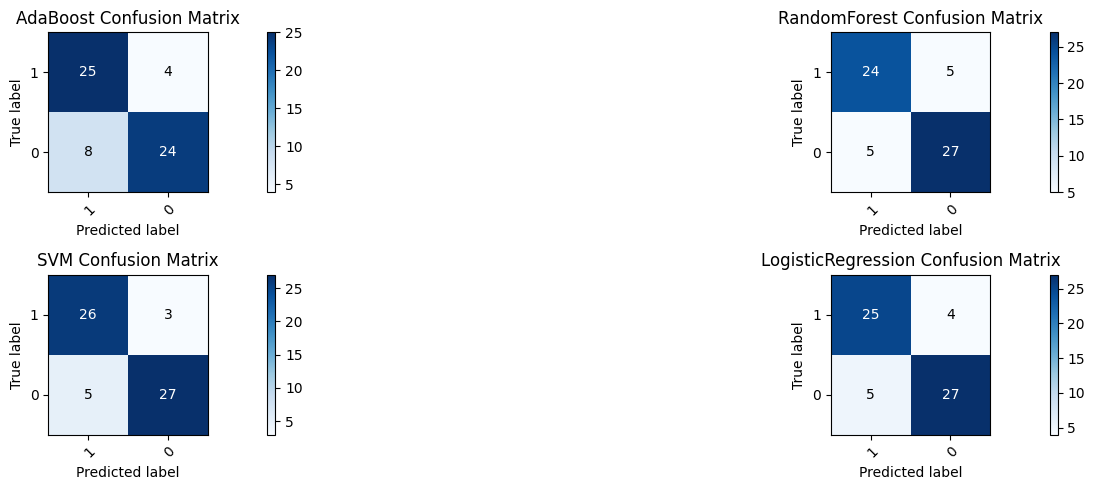

AdaBoost Accuracy: 0.8478260869565217
AdaBoost Confusion Matrix:
 [[66 11]
 [17 90]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

RandomForestClassifier Accuracy: 0.875
RandomForestClassifier Confusion Matrix:
 [[66 11]
 [12 95]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

SVC Accuracy: 0.875
SVC Confusion Matrix:
 [[67 10]
 [13 94]]
SVC Classification 

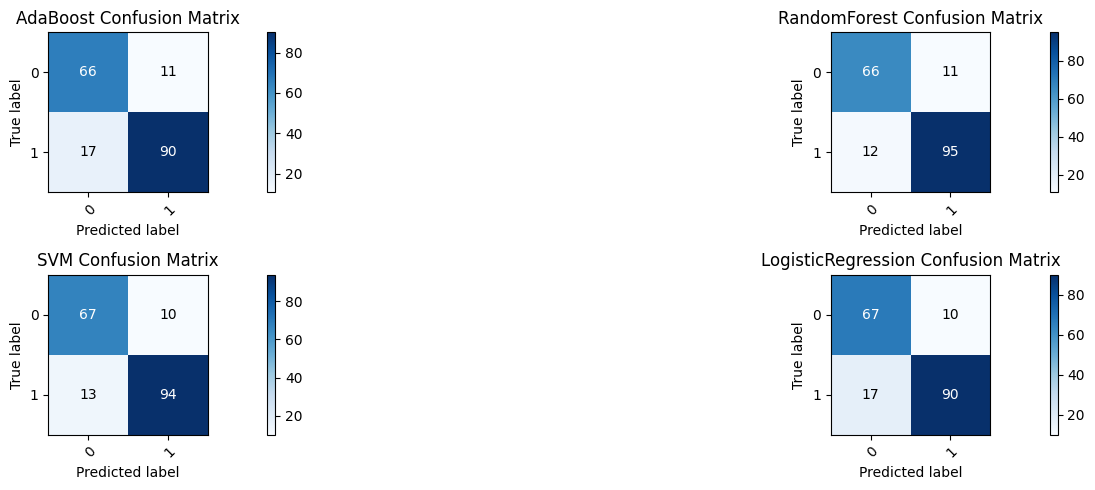

AdaBoost Accuracy: 0.75
AdaBoost Confusion Matrix:
 [[30  5]
 [10 15]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60

RandomForestClassifier Accuracy: 0.75
RandomForestClassifier Confusion Matrix:
 [[33  2]
 [13 12]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

SVC Accuracy: 0.75
SVC Confusion Matrix:
 [[33  2]
 [13 12]]
SVC Classification Report:
        

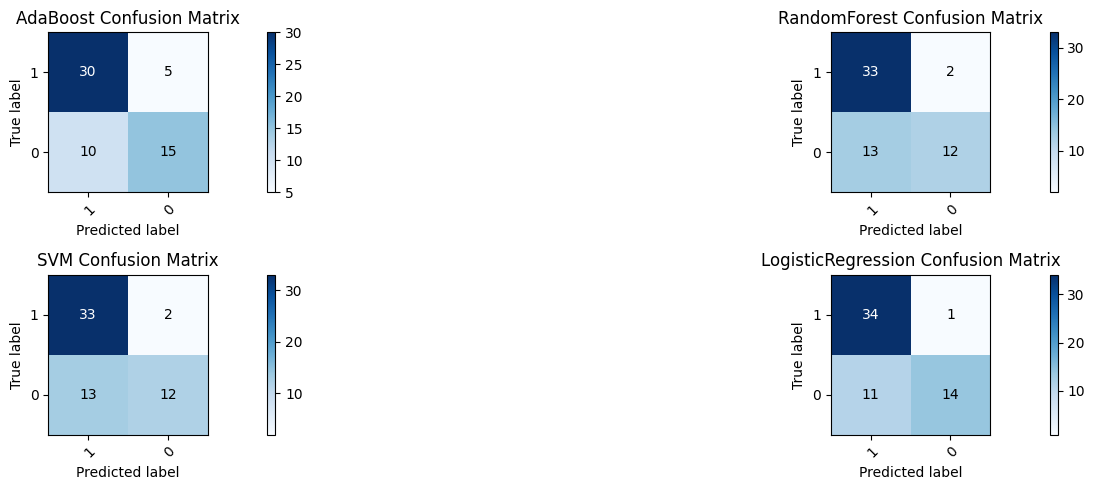

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")


def train_and_evaluate_adaboost(X_train_scaled, X_test_scaled, y_train, y_test):
    ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_boost_classifier.fit(X_train_scaled, y_train)
    y_pred = ada_boost_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print("AdaBoost Accuracy:", accuracy)
    print("AdaBoost Confusion Matrix:\n", confusion_mat)
    print("AdaBoost Classification Report:\n", classification_rep)

    return confusion_mat

def train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"{type(model).__name__} Accuracy:", accuracy)
    print(f"{type(model).__name__} Confusion Matrix:\n", confusion_mat)
    print(f"{type(model).__name__} Classification Report:\n", classification_rep)

    return confusion_mat

def read_and_evaluate_all_models(csv_file_path):
    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    feature_columns = df.columns[:-1]
    target_column = df.columns[-1]

    X = df[feature_columns]
    y = df[target_column]

    categorical_columns = X.select_dtypes(include=['object']).columns
    X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    models = {
        'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(),
        'LogisticRegression': LogisticRegression(random_state=42)
    }

    confusion_matrices = {}

    for model_name, model in models.items():
        if model_name == 'AdaBoost':
            confusion_matrices[model_name] = train_and_evaluate_adaboost(X_train_scaled, X_test_scaled, y_train, y_test)
        else:
            confusion_matrices[model_name] = train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

    # Plot confusion matrices for all models on the first dataset
    fig, axs = plt.subplots(2, 2, figsize=(20, 5))

    for i, (model, cm) in enumerate(confusion_matrices.items()):
        plot_confusion_matrix(axs[i//2, i%2], cm, classes=y.unique(), title=f'{model} Confusion Matrix')

    plt.tight_layout()
    plt.show()




# List of your dataset file paths
dataset_files = ['https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv', '/content/heart.csv', '/content/heart_failure_clinical_records_dataset.csv']

# Call the function and plot confusion matrices
for path in dataset_files:
    read_and_evaluate_all_models(path)



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def train_and_evaluate_adaboost(X_train_scaled, X_test_scaled, y_train, y_test):
    ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_boost_classifier.fit(X_train_scaled, y_train)
    y_pred = ada_boost_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    y_pred_prob = ada_boost_classifier.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc:.3f})')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    print("AdaBoost Accuracy:", accuracy)
    print("AdaBoost Confusion Matrix:\n", confusion_mat)
    print("AdaBoost Classification Report:\n", classification_rep)

    return confusion_mat

def train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.3f})')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    print(f"{type(model).__name__} Accuracy:", accuracy)
    print(f"{type(model).__name__} Confusion Matrix:\n", confusion_mat)
    print(f"{type(model).__name__} Classification Report:\n", classification_rep)

    return confusion_mat

# Rest of your code here...


AdaBoost Accuracy: 0.8032786885245902
AdaBoost Confusion Matrix:
 [[25  4]
 [ 8 24]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

RandomForestClassifier Accuracy: 0.8360655737704918
RandomForestClassifier Confusion Matrix:
 [[24  5]
 [ 5 27]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

SVC Accuracy: 0.8688524590163934
SVC Confusion Matrix:
 [[26  3]
 [ 

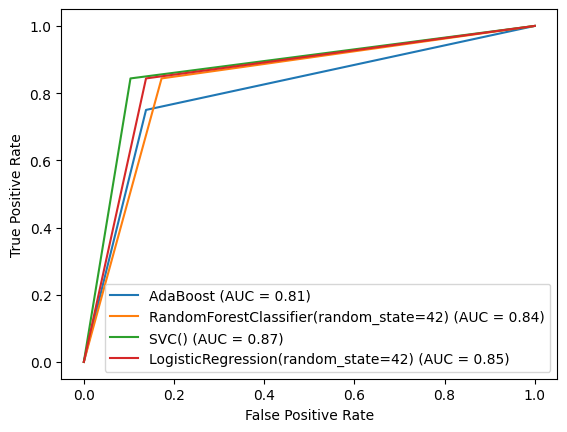

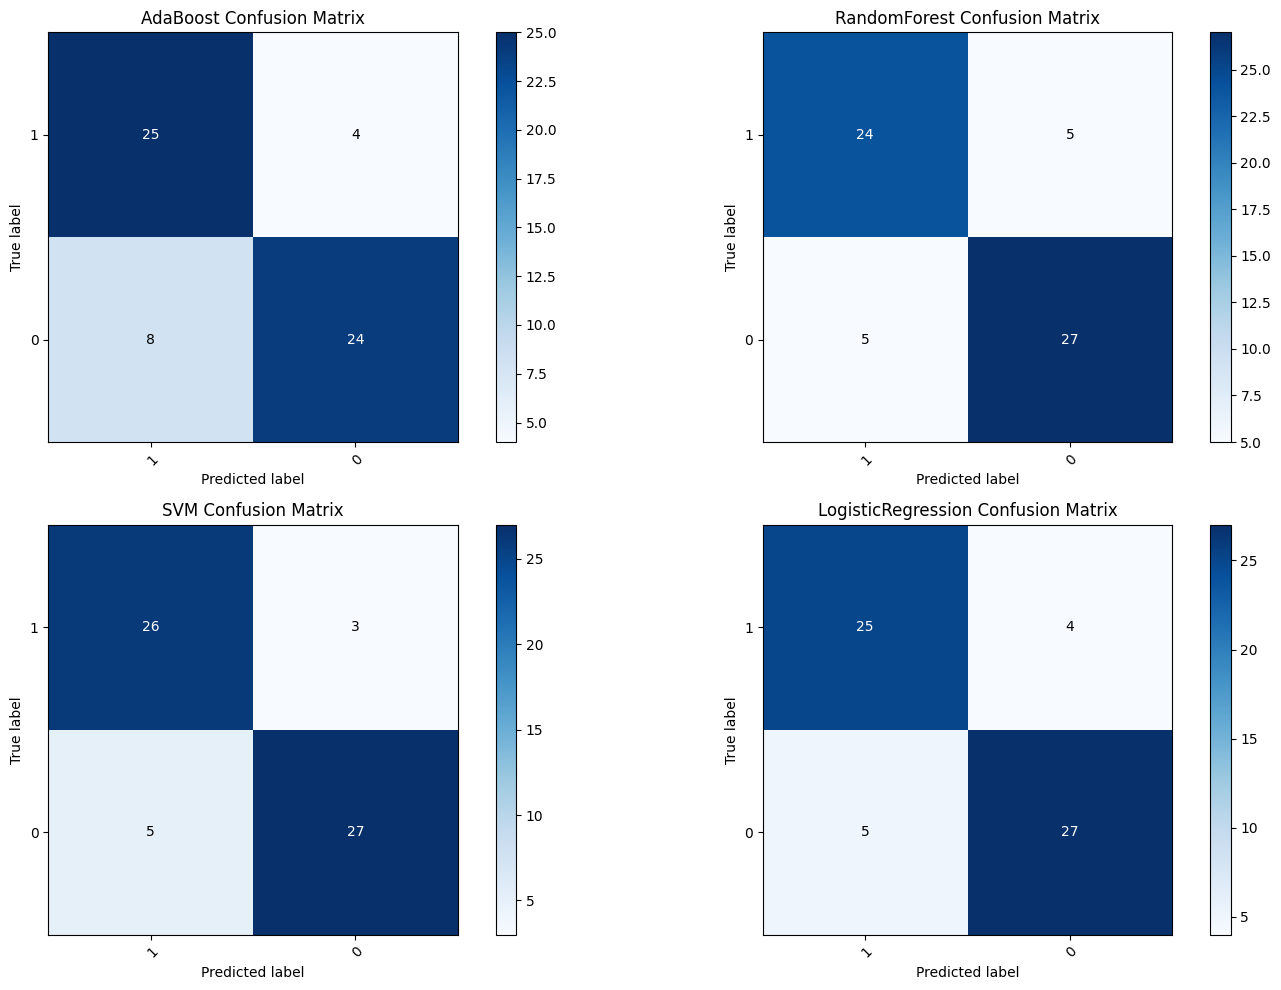

AdaBoost Accuracy: 0.8478260869565217
AdaBoost Confusion Matrix:
 [[66 11]
 [17 90]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

RandomForestClassifier Accuracy: 0.875
RandomForestClassifier Confusion Matrix:
 [[66 11]
 [12 95]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

SVC Accuracy: 0.875
SVC Confusion Matrix:
 [[67 10]
 [13 94]]
SVC Classification 

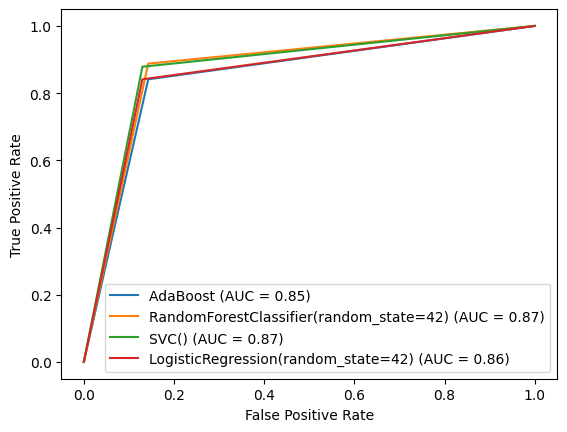

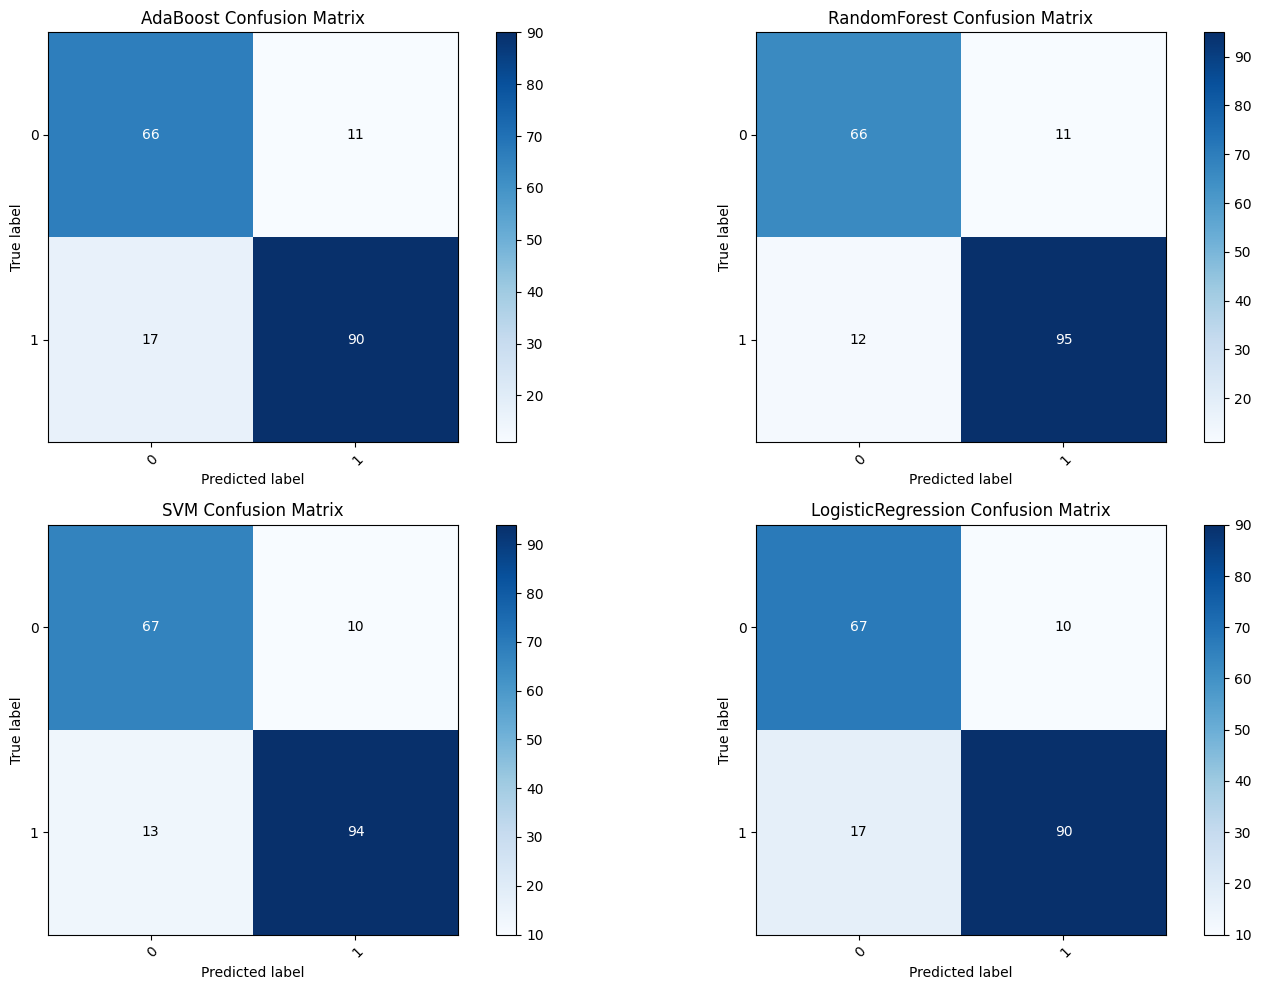

AdaBoost Accuracy: 0.75
AdaBoost Confusion Matrix:
 [[30  5]
 [10 15]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60

RandomForestClassifier Accuracy: 0.75
RandomForestClassifier Confusion Matrix:
 [[33  2]
 [13 12]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

SVC Accuracy: 0.75
SVC Confusion Matrix:
 [[33  2]
 [13 12]]
SVC Classification Report:
        

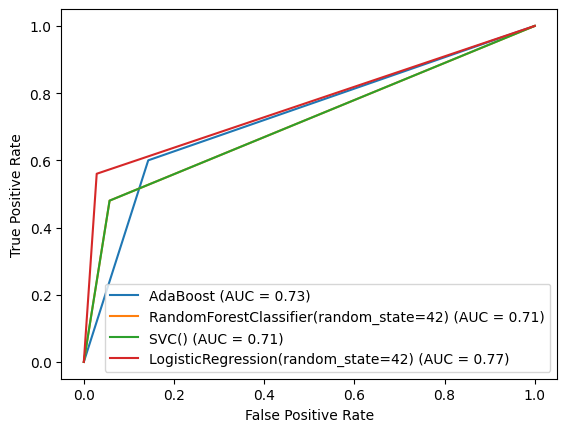

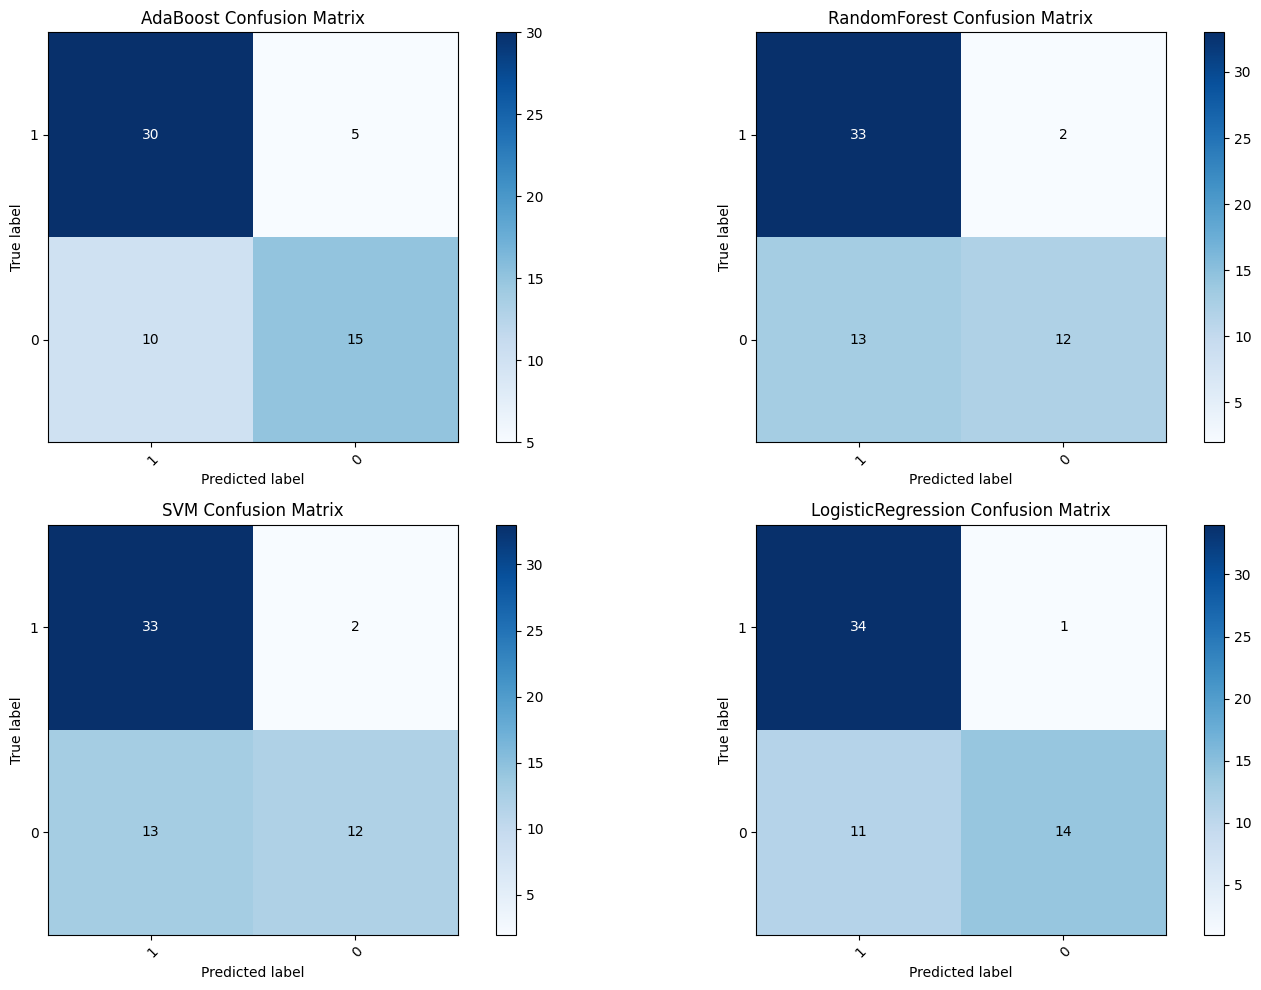

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
# Function to plot confusion matrix
def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

def train_and_evaluate_adaboost(X_train_scaled, X_test_scaled, y_train, y_test):
    ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_boost_classifier.fit(X_train_scaled, y_train)
    y_pred = ada_boost_classifier.predict(X_test_scaled)
    plot_roc_curve(y_test, y_pred, 'AdaBoost')
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print("AdaBoost Accuracy:", accuracy)
    print("AdaBoost Confusion Matrix:\n", confusion_mat)
    print("AdaBoost Classification Report:\n", classification_rep)

    return confusion_mat
def plot_roc_curve(y_true, y_score, model_name):
  # Compute ROC curve and area under the curve (AUC)
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  auc_score = auc(fpr, tpr)

  # Plot ROC curve
  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')
def train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plot_roc_curve(y_test, y_pred, model)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"{type(model).__name__} Accuracy:", accuracy)
    print(f"{type(model).__name__} Confusion Matrix:\n", confusion_mat)
    print(f"{type(model).__name__} Classification Report:\n", classification_rep)

    return confusion_mat

def read_and_evaluate_all_models(csv_file_path):
    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    feature_columns = df.columns[:-1]
    target_column = df.columns[-1]

    X = df[feature_columns]
    y = df[target_column]

    categorical_columns = X.select_dtypes(include=['object']).columns
    X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    models = {
        'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(),
        'LogisticRegression': LogisticRegression(random_state=42)
    }

    confusion_matrices = {}

    for model_name, model in models.items():
        if model_name == 'AdaBoost':
            confusion_matrices[model_name] = train_and_evaluate_adaboost(X_train_scaled, X_test_scaled, y_train, y_test)
        else:
            confusion_matrices[model_name] = train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

    # Plot confusion matrices for all models on the first dataset

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    for (model, cm), ax in zip(confusion_matrices.items(), axs.ravel()):
        plot_confusion_matrix(ax, cm, classes=y.unique(), title=f'{model} Confusion Matrix')

    plt.tight_layout()
    plt.show()

# List of your dataset file paths
dataset_files = ['https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv', '/content/heart.csv', '/content/heart_failure_clinical_records_dataset.csv']

# Call the function and plot confusion matrices
for path in dataset_files:
    read_and_evaluate_all_models(path)


AdaBoost Accuracy: 0.8032786885245902
AdaBoost Confusion Matrix:
 [[25  4]
 [ 8 24]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
RandomForestClassifier Accuracy: 0.8688524590163934
RandomForestClassifier Confusion Matrix:
 [[24  5]
 [ 3 29]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87 

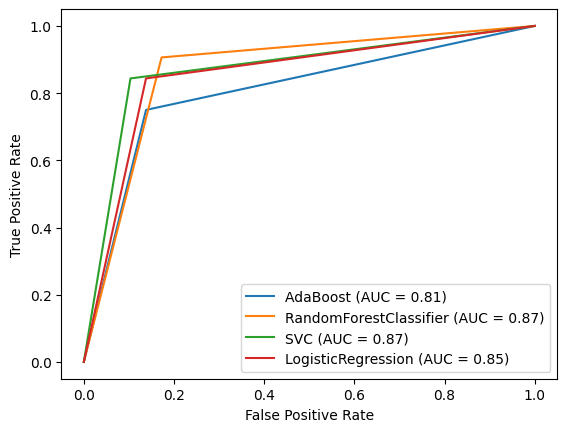

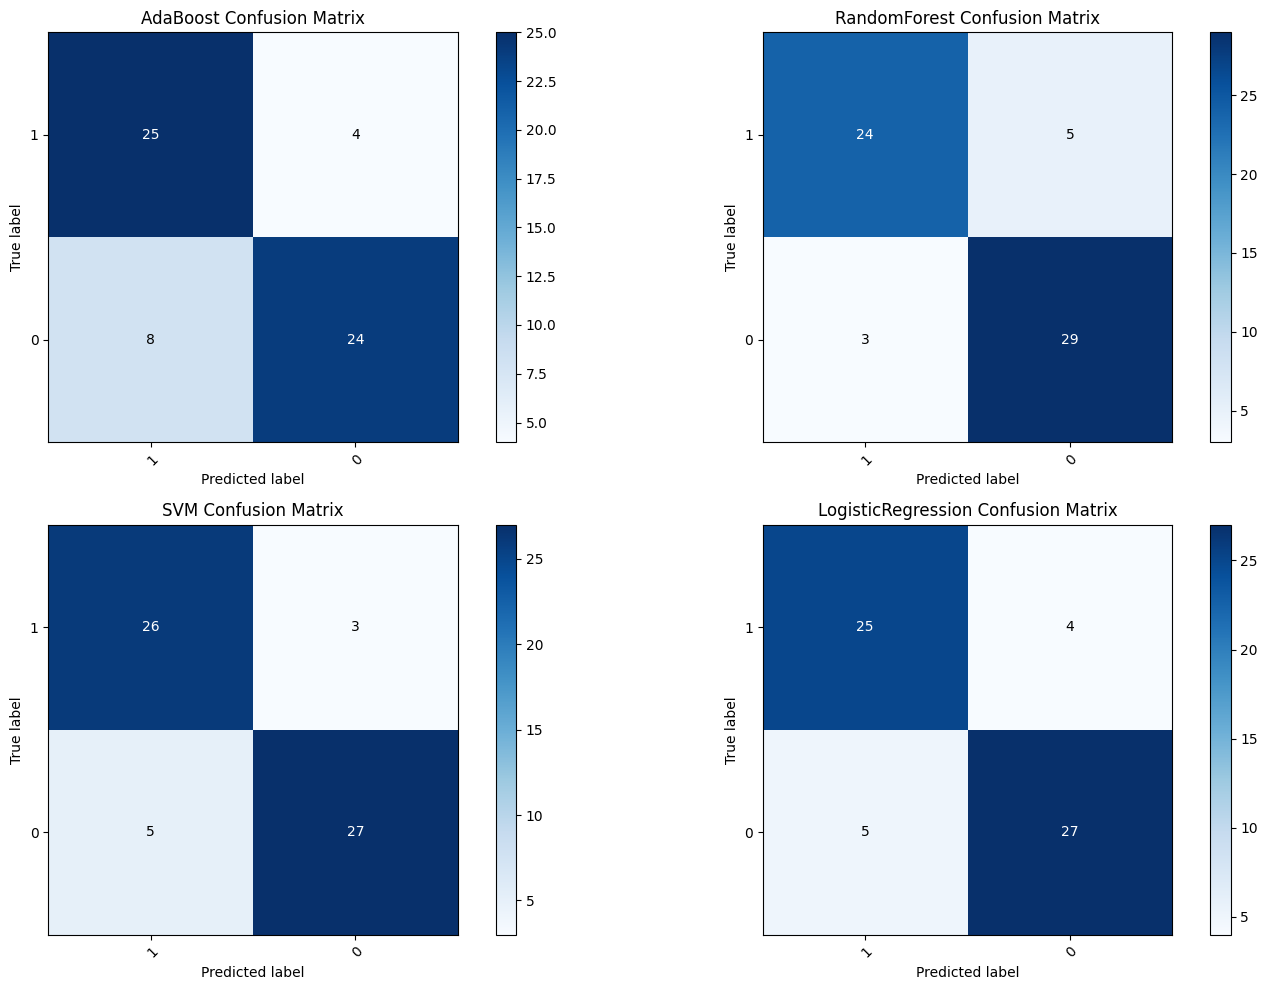

AdaBoost Accuracy: 0.8478260869565217
AdaBoost Confusion Matrix:
 [[66 11]
 [17 90]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestClassifier Accuracy: 0.875
RandomForestClassifier Confusion Matrix:
 [[66 11]
 [12 95]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88    

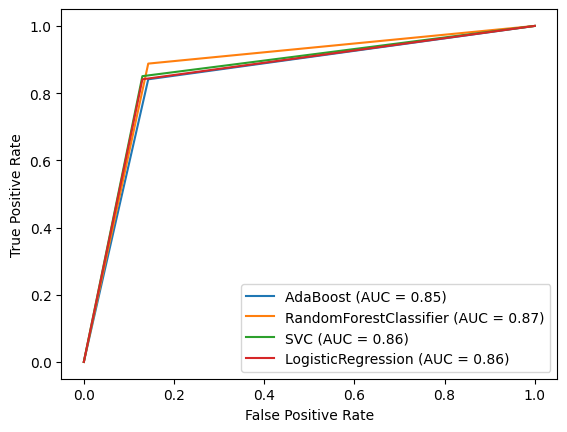

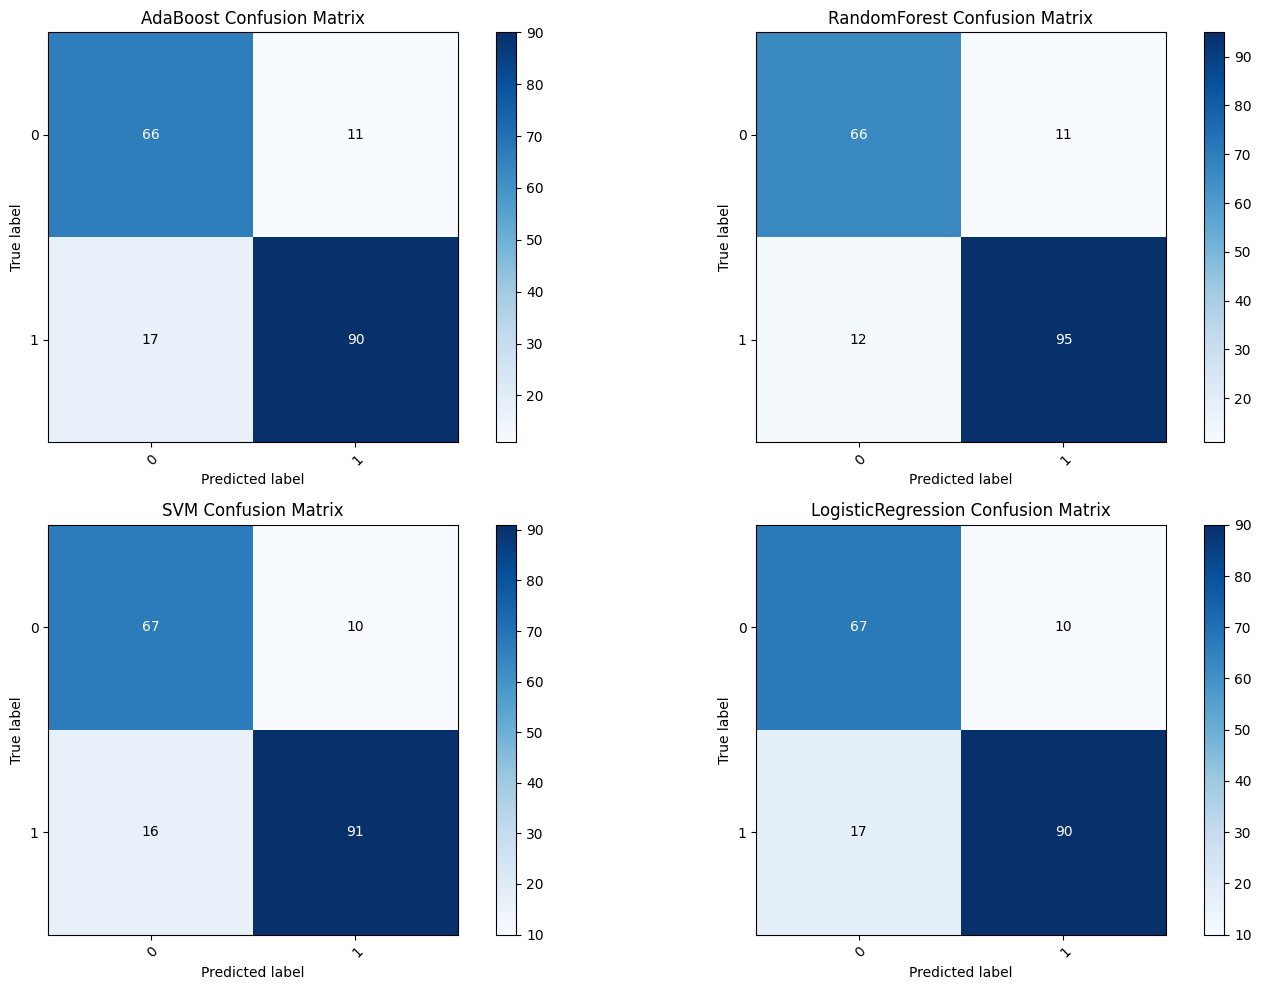

AdaBoost Accuracy: 0.75
AdaBoost Confusion Matrix:
 [[30  5]
 [10 15]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestClassifier Accuracy: 0.75
RandomForestClassifier Confusion Matrix:
 [[33  2]
 [13 12]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        6

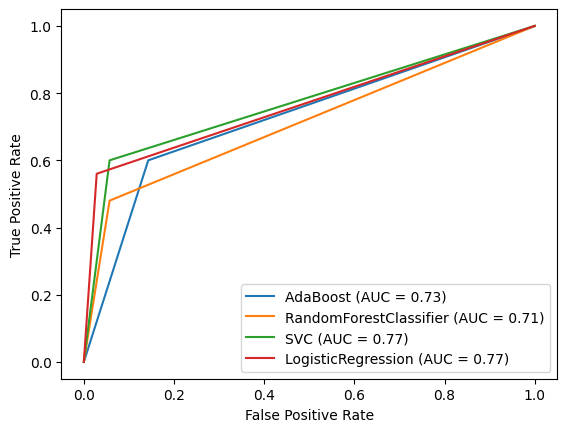

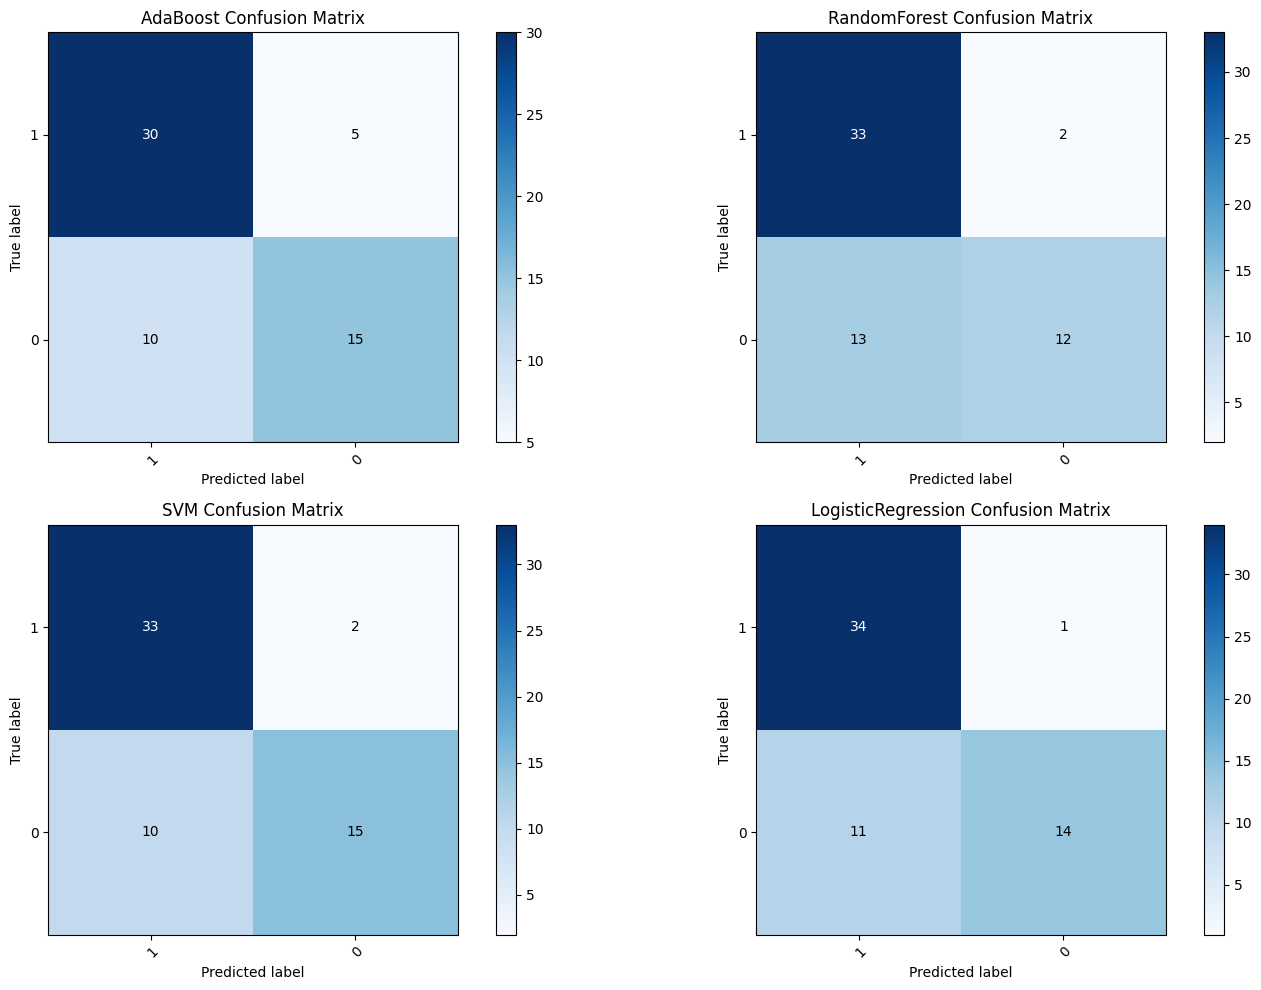

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

# Function to plot confusion matrix
def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

def train_and_evaluate_adaboost(X_train_scaled, X_test_scaled, y_train, y_test):
    ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_boost_classifier.fit(X_train_scaled, y_train)
    y_pred = ada_boost_classifier.predict(X_test_scaled)
    plot_roc_curve(y_test, y_pred, 'AdaBoost')
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print("AdaBoost Accuracy:", accuracy)
    print("AdaBoost Confusion Matrix:\n", confusion_mat)
    print("AdaBoost Classification Report:\n", classification_rep)

    return confusion_mat

def plot_roc_curve(y_true, y_score, model_name):
  # Compute ROC curve and area under the curve (AUC)
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  auc_score = auc(fpr, tpr)

  # Plot ROC curve
  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

def train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plot_roc_curve(y_test, y_pred, type(model).__name__)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"{type(model).__name__} Accuracy:", accuracy)
    print(f"{type(model).__name__} Confusion Matrix:\n", confusion_mat)
    print(f"{type(model).__name__} Classification Report:\n", classification_rep)

    return confusion_mat

def read_and_evaluate_all_models(csv_file_path):
    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    feature_columns = df.columns[:-1]
    target_column = df.columns[-1]

    X = df[feature_columns]
    y = df[target_column]

    categorical_columns = X.select_dtypes(include=['object']).columns
    X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    models = {
        'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
        'RandomForest': RandomForestClassifier(random_state=42),
        'SVM': SVC(),
        'LogisticRegression': LogisticRegression(random_state=42)
    }

    confusion_matrices = {}

    for model_name, model in models.items():
        if model_name == 'AdaBoost':
            confusion_matrices[model_name] = train_and_evaluate_adaboost(X_train_scaled, X_test_scaled, y_train, y_test)
        elif model_name == 'RandomForest':
            param_grid = {
                'n_estimators': [50, 100, 150],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
            grid_search.fit(X_train_scaled, y_train)
            model = grid_search.best_estimator_
            print(f"Best parameters for {model_name}: {grid_search.best_params_}")
            confusion_matrices[model_name] = train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
        elif model_name == 'SVM':
            param_grid = {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
            grid_search.fit(X_train_scaled, y_train)
            model = grid_search.best_estimator_
            print(f"Best parameters for {model_name}: {grid_search.best_params_}")
            confusion_matrices[model_name] = train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
        else:
            confusion_matrices[model_name] = train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

    # Plot confusion matrices for all models on the first dataset

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    for (model, cm), ax in zip(confusion_matrices.items(), axs.ravel()):
        plot_confusion_matrix(ax, cm, classes=y.unique(), title=f'{model} Confusion Matrix')
AdaBoost
    plt.tight_layout()
    plt.show()

# List of your dataset file paths
dataset_files = ['https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv', '/content/heart.csv', '/content/heart_failure_clinical_records_dataset.csv']

# Call the function and plot confusion matrices
for path in dataset_files:
    read_and_evaluate_all_models(path)


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np

def train_bagging_classifier(X_train_scaled, X_test_scaled, y_train, y_test, rf_params, svm_params):
    # Define the RandomForestClassifier and SVM models with the best hyperparameters
    rf_model = RandomForestClassifier(**rf_params)
    svm_model = SVC(probability=True, **svm_params)  # Set probability=True for SVC

    # Create the ensemble using BaggingClassifier with RandomForest and SVM base classifiers
    ensemble = BaggingClassifier(base_estimator=rf_model, n_estimators=10, random_state=42)

    # Train the ensemble model
    ensemble.fit(X_train_scaled, y_train)

    # Evaluate the ensemble model
    y_pred_ensemble = ensemble.predict(X_test_scaled)
    accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
    confusion_mat_ensemble = confusion_matrix(y_test, y_pred_ensemble)
    classification_rep_ensemble = classification_report(y_test, y_pred_ensemble)

    print("Ensemble (RandomForest + SVM) Accuracy:", accuracy_ensemble)
    print("Ensemble Confusion Matrix:\n", confusion_mat_ensemble)
    print("Ensemble Classification Report:\n", classification_rep_ensemble)

    return confusion_mat_ensemble

# List of dataset file paths
dataset_files = ['https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv','/content/heart.csv', '/content/heart_failure_clinical_records_dataset.csv']

for path in dataset_files:
    # Read the CSV file
    df = pd.read_csv(path)
    if 'target' in df.columns:
      target_column = 'target'
    elif 'HeartDisease' in df.columns:
        target_column = 'HeartDisease'
    elif 'DEATH_EVENT' in df.columns:
        target_column = 'DEATH_EVENT'
    else:
        print(f"Target column not found in dataset: {path}")
        continue

    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    print(f"Dataset:{path}")
    # Perform one-hot encoding for categorical variables if any
    X_encoded = pd.get_dummies(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Best hyperparameters obtained from hyperparameter tuning
    rf_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'random_state': 42}
    svm_params = {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}

    # Train and evaluate the ensemble model
    confusion_mat_ensemble = train_bagging_classifier(X_train_scaled, X_test_scaled, y_train, y_test, rf_params, svm_params)


Dataset:https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble (RandomForest + SVM) Accuracy: 0.8852459016393442
Ensemble Confusion Matrix:
 [[25  4]
 [ 3 29]]
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Dataset:/content/heart.csv


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble (RandomForest + SVM) Accuracy: 0.8695652173913043
Ensemble Confusion Matrix:
 [[66 11]
 [13 94]]
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Dataset:/content/heart_failure_clinical_records_dataset.csv


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble (RandomForest + SVM) Accuracy: 0.75
Ensemble Confusion Matrix:
 [[33  2]
 [13 12]]
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np

def train_stacking_classifier(X_train_scaled, X_test_scaled, y_train, y_test, rf_params, svm_params):
    # Define the RandomForestClassifier and SVM models with the best hyperparameters
    rf_model = RandomForestClassifier(**rf_params)
    svm_model = SVC(probability=True, **svm_params)  # Set probability=True for SVC

    # Create the ensemble using StackingClassifier with RandomForest and SVM base classifiers
    estimators = [('RandomForest', rf_model), ('SVM', svm_model)]
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=rf_model)

    # Train the stacking model
    stacking_model.fit(X_train_scaled, y_train)

    # Evaluate the stacking model
    y_pred_stacking = stacking_model.predict(X_test_scaled)
    accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
    confusion_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
    classification_rep_stacking = classification_report(y_test, y_pred_stacking)

    print("Stacking (RandomForest + SVM) Accuracy:", accuracy_stacking)
    print("Stacking Confusion Matrix:\n", confusion_mat_stacking)
    print("Stacking Classification Report:\n", classification_rep_stacking)

    return confusion_mat_stacking

# List of dataset file paths
dataset_files = ['https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv','/content/heart.csv', '/content/heart_failure_clinical_records_dataset.csv']

for path in dataset_files:
    # Read the CSV file
    df = pd.read_csv(path)
    if 'target' in df.columns:
      target_column = 'target'
    elif 'HeartDisease' in df.columns:
        target_column = 'HeartDisease'
    elif 'DEATH_EVENT' in df.columns:
        target_column = 'DEATH_EVENT'
    else:
        print(f"Target column not found in dataset: {path}")
        continue

    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    print(f"Dataset:{path}")
    # Perform one-hot encoding for categorical variables if any
    X_encoded = pd.get_dummies(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Best hyperparameters obtained from hyperparameter tuning
    rf_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'random_state': 42}
    svm_params = {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}

    # Train and evaluate the ensemble model
    confusion_mat_stacking = train_stacking_classifier(X_train_scaled, X_test_scaled, y_train, y_test, rf_params, svm_params)


Dataset:https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv
Stacking (RandomForest + SVM) Accuracy: 0.8524590163934426
Stacking Confusion Matrix:
 [[27  2]
 [ 7 25]]
Stacking Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Dataset:/content/heart.csv
Stacking (RandomForest + SVM) Accuracy: 0.8478260869565217
Stacking Confusion Matrix:
 [[66 11]
 [17 90]]
Stacking Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weigh

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ROC Curve
plt.figure(figsize=(8, 6))

# Compute ROC curve and AUC for each class
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_stacking == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


NameError: name 'y_pred_stacking' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
base_classifier = DecisionTreeClassifier(max_depth=1)

In [ ]:
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1.0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
ada_boost_classifier.fit(X_train, y_train)
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8026315789473685
Precision: 0.8421052631578947
Recall: 0.7804878048780488
F1 Score: 0.810126582278481

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.84      0.78      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [ ]:
df1 = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
X = df1.drop('DEATH_EVENT', axis=1)
y = df1['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
base_classifier = DecisionTreeClassifier(max_depth=2)
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1.0)


In [ ]:
ada_boost_classifier.fit(X_train, y_train)

y_pred = ada_boost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7066666666666667
Precision: 0.6666666666666666
Recall: 0.5806451612903226
F1 Score: 0.6206896551724138

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        44
           1       0.67      0.58      0.62        31

    accuracy                           0.71        75
   macro avg       0.70      0.69      0.69        75
weighted avg       0.70      0.71      0.70        75



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
df2= pd.read_csv('/content/heart.csv')
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoder = LabelEncoder()

for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column])
X = df2.drop('HeartDisease', axis=1)
y = df2['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
base_classifier = DecisionTreeClassifier(max_depth=2)
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1.0)

In [ ]:
ada_boost_classifier.fit(X_train, y_train)

y_pred = ada_boost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8608695652173913
Precision: 0.9032258064516129
Recall: 0.8484848484848485
F1 Score: 0.875

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.90      0.85      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_and_evaluate_adaboost(csv_file_path):
    # Load the data from the CSV file
    df = pd.read_csv(csv_file_path)

    # Extract column names dynamically
    feature_columns = df.columns[:-1]  # All columns except the last one
    target_column = df.columns[-1]      # The last column

    # Separate features (X) and target variable (y)
    X = df[feature_columns]
    y = df[target_column]

    # Identify and encode categorical columns using one-hot encoding
    categorical_columns = X.select_dtypes(include=['object']).columns
    X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train the AdaBoostClassifier
    ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_boost_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = ada_boost_classifier.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print the results
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    print("Classification Report:\n", classification_rep)

    # Return the trained model (optional)
    return ada_boost_classifier

# List of your dataset file paths
dataset_files = ['https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv', '/content/heart.csv', '/content/heart_failure_clinical_records_dataset.csv']

# Loop over each dataset
for dataset_file in dataset_files:
    print(f"\nTraining and evaluating AdaBoost for {dataset_file}:")
    trained_model = train_and_evaluate_adaboost(dataset_file)



Training and evaluating AdaBoost for https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv:
Accuracy: 0.8032786885245902
Confusion Matrix:
 [[25  4]
 [ 8 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61


Training and evaluating AdaBoost for /content/heart.csv:
Accuracy: 0.8478260869565217
Confusion Matrix:
 [[66 11]
 [17 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      

In [ ]:
df1 = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

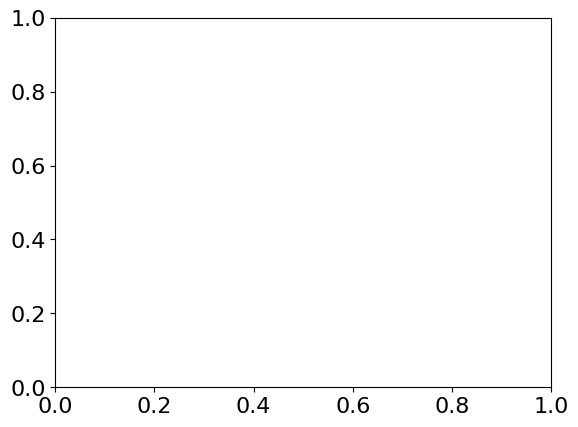

In [ ]:
# prompt: increase the font size in confusion matrix

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


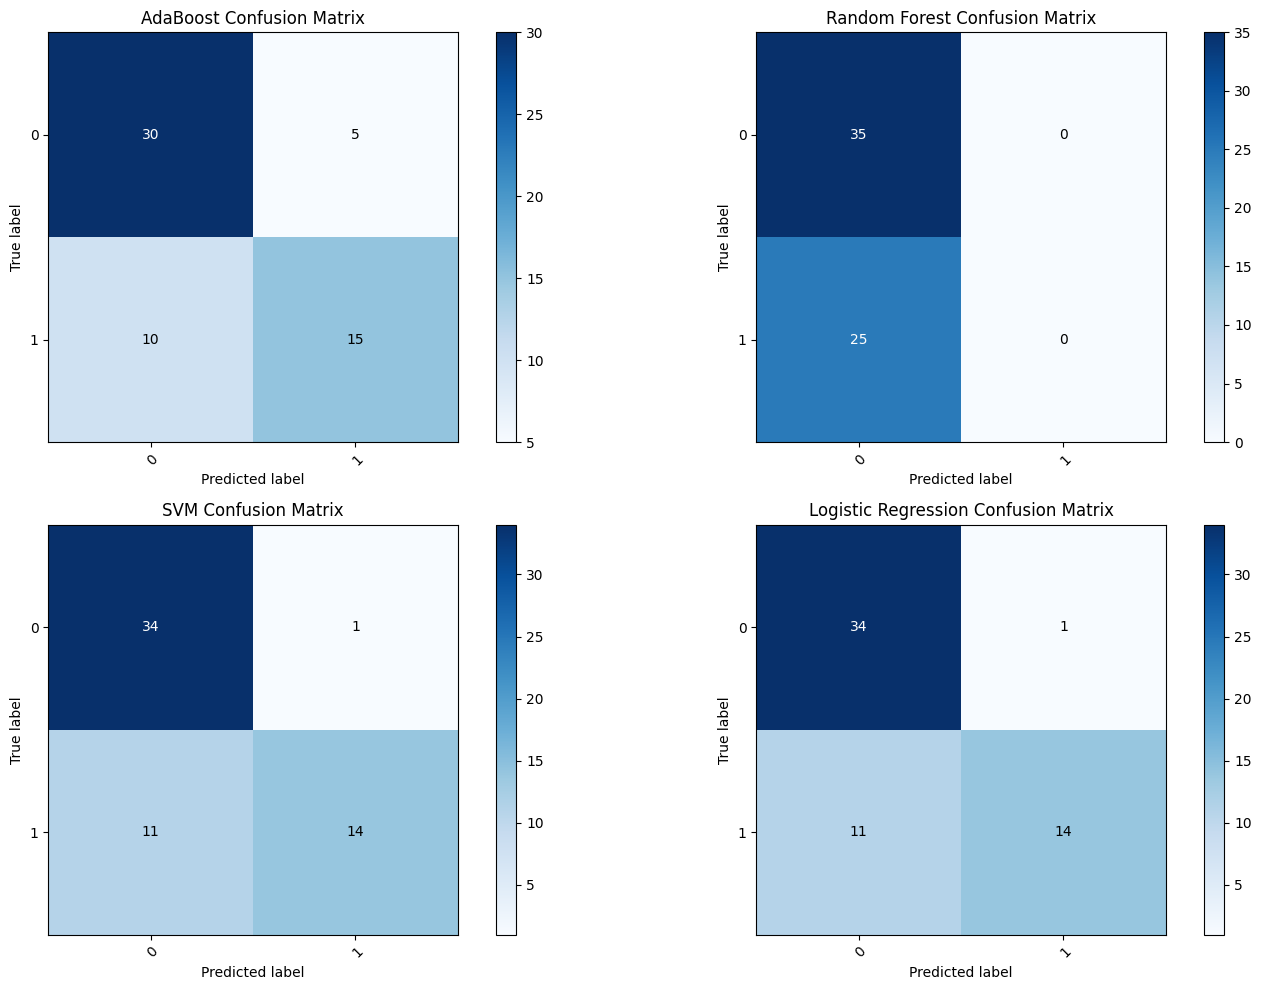

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Sample confusion matrices
confusion_matrix_adaboost = np.array([[30, 5], [10, 15]])
confusion_matrix_svm = np.array([[35, 0], [25, 0]])
confusion_matrix_logistic_regression = np.array([[34, 1], [11, 14]])
confusion_matrix_random_forest = np.array([[33, 2], [13, 12]])

def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

# Plotting 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_confusion_matrix(axs[0, 0], confusion_matrix_adaboost, classes=['0', '1'], title='AdaBoost Confusion Matrix')
plot_confusion_matrix(axs[0, 1], confusion_matrix_svm, classes=['0', '1'], title='Random Forest Confusion Matrix')
plot_confusion_matrix(axs[1, 0], confusion_matrix_logistic_regression, classes=['0', '1'], title='SVM Confusion Matrix')
plot_confusion_matrix(axs[1, 1], confusion_matrix_logistic_regression, classes=['0', '1'], title='Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()


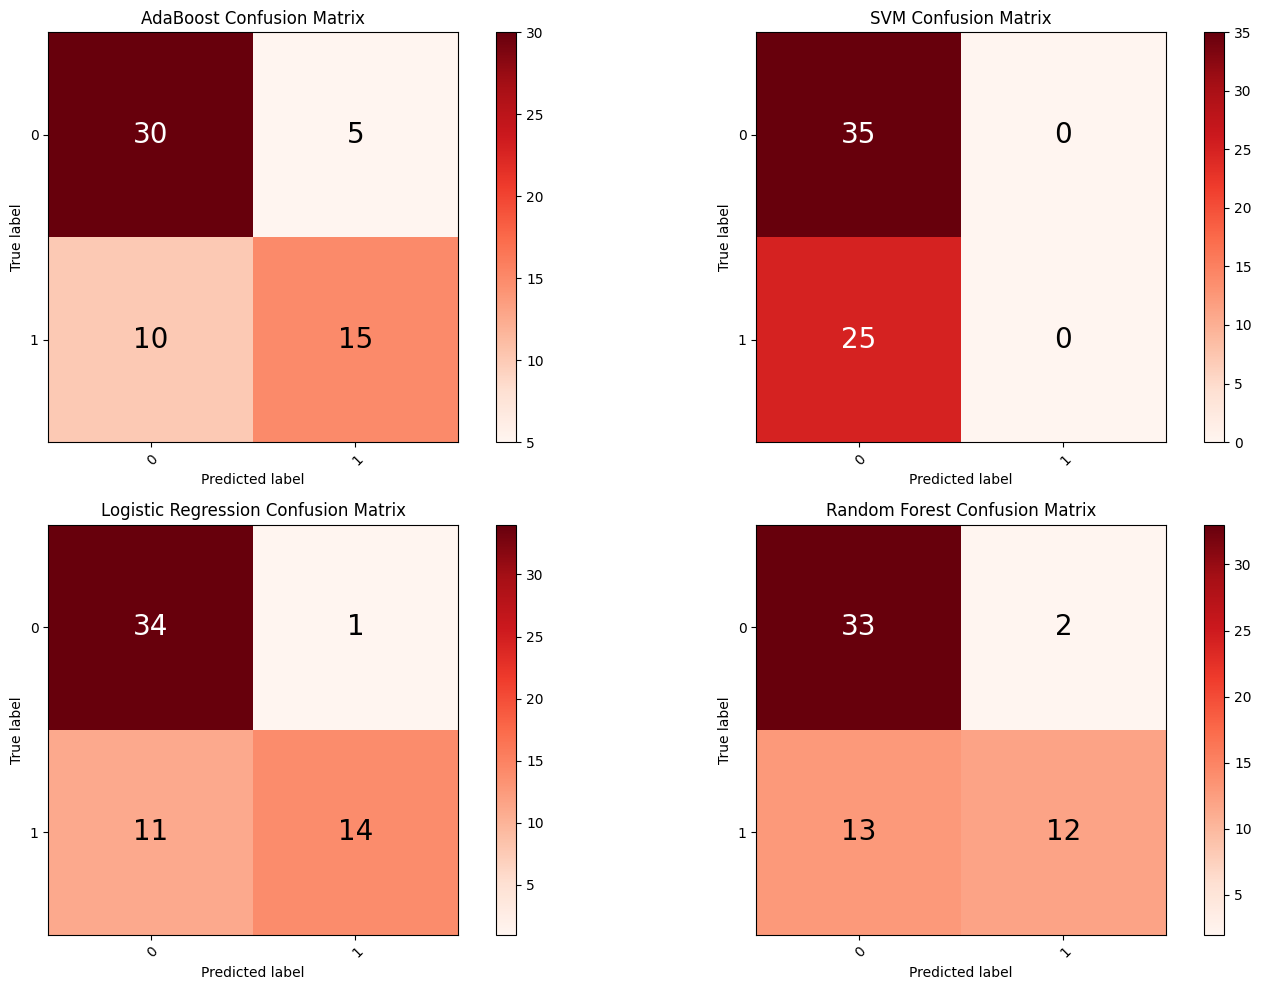

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Sample confusion matrices
confusion_matrix_adaboost = np.array([[30, 5], [10, 15]])
confusion_matrix_svm = np.array([[35, 0], [25, 0]])
confusion_matrix_logistic_regression = np.array([[34, 1], [11, 14]])
confusion_matrix_random_forest = np.array([[33, 2], [13, 12]])

def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)  # Change colormap to Reds
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=20)  # Increase font size

# Plotting 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_confusion_matrix(axs[0, 0], confusion_matrix_adaboost, classes=['0', '1'], title='AdaBoost Confusion Matrix')
plot_confusion_matrix(axs[0, 1], confusion_matrix_svm, classes=['0', '1'], title='SVM Confusion Matrix')
plot_confusion_matrix(axs[1, 0], confusion_matrix_logistic_regression, classes=['0', '1'], title='Logistic Regression Confusion Matrix')
plot_confusion_matrix(axs[1, 1], confusion_matrix_random_forest, classes=['0', '1'], title='Random Forest Confusion Matrix')  # Fix here

plt.tight_layout()
plt.show()


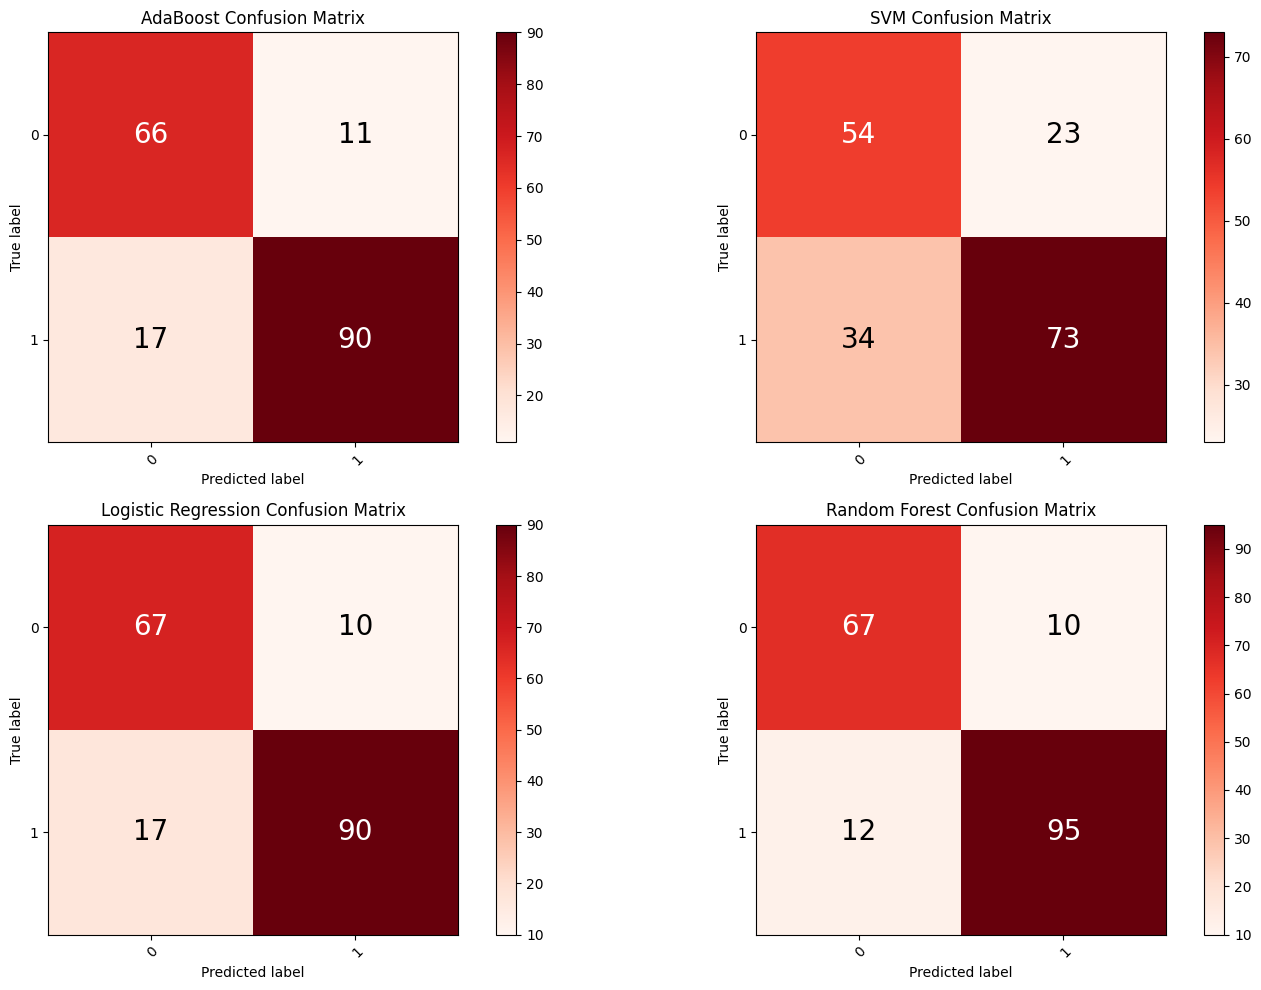

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Sample confusion matrices
confusion_matrix_adaboost = np.array([[66, 11], [17, 90]])
confusion_matrix_svm = np.array([[54, 23], [34, 73]])
confusion_matrix_logistic_regression = np.array([[67, 10], [17, 90]])
confusion_matrix_random_forest = np.array([[67, 10], [12, 95]])



def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)  # Change colormap to Reds
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=20)  # Increase font size

# Plotting 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_confusion_matrix(axs[0, 0], confusion_matrix_adaboost, classes=['0', '1'], title='AdaBoost Confusion Matrix')
plot_confusion_matrix(axs[0, 1], confusion_matrix_svm, classes=['0', '1'], title='SVM Confusion Matrix')
plot_confusion_matrix(axs[1, 0], confusion_matrix_logistic_regression, classes=['0', '1'], title='Logistic Regression Confusion Matrix')
plot_confusion_matrix(axs[1, 1], confusion_matrix_random_forest, classes=['0', '1'], title='Random Forest Confusion Matrix')  # Fix here

plt.tight_layout()
plt.show()


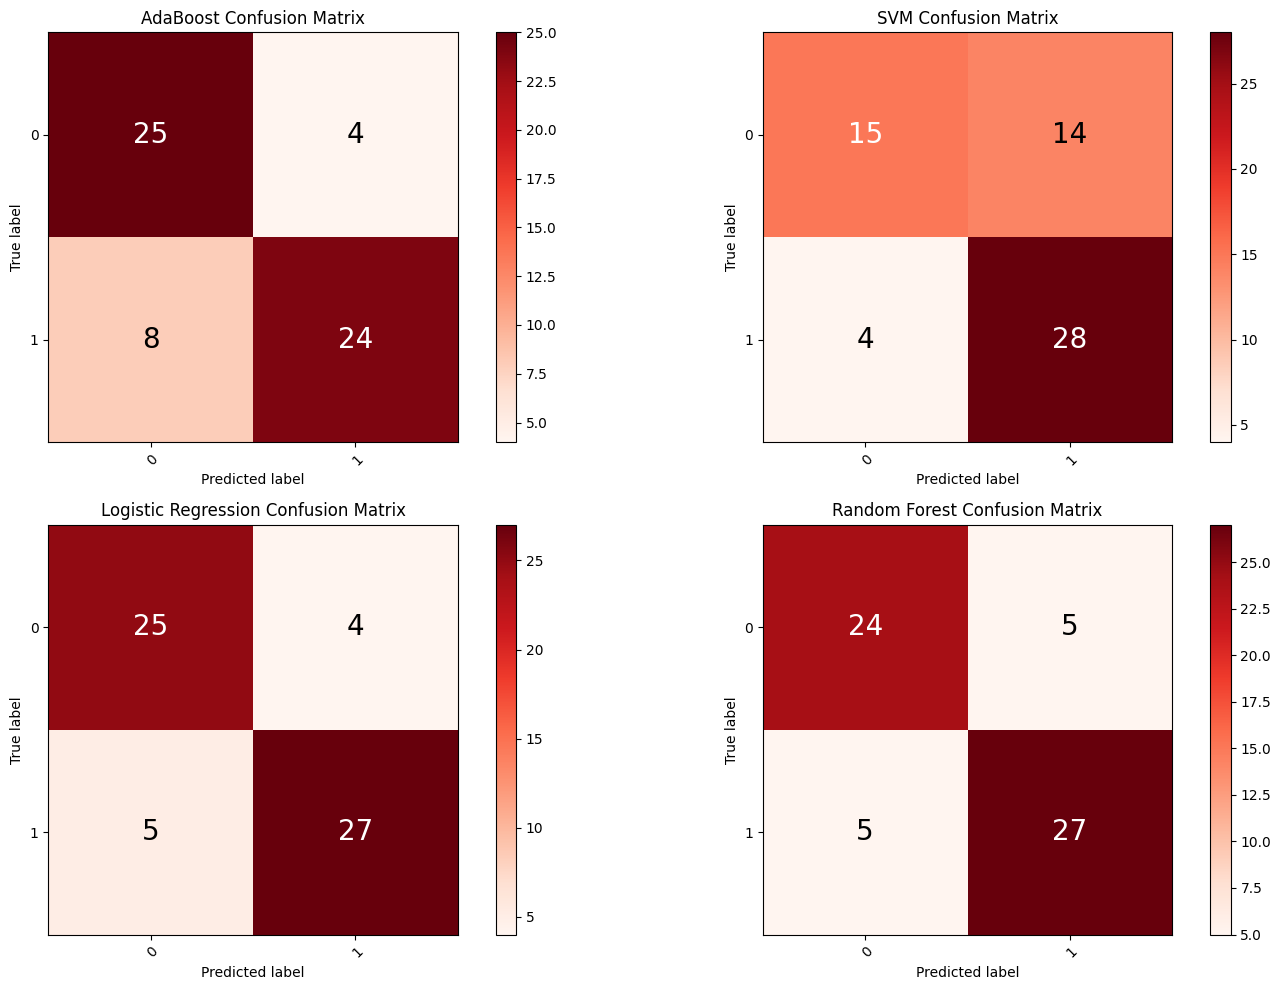

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Sample confusion matrices
confusion_matrix_adaboost = np.array([[25, 4], [8, 24]])
confusion_matrix_svm = np.array([[15, 14], [4, 28]])
confusion_matrix_logistic_regression = np.array([[25, 4], [5, 27]])
confusion_matrix_random_forest = np.array([[24, 5], [5, 27]])



def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)  # Change colormap to Reds
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=20)  # Increase font size

# Plotting 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_confusion_matrix(axs[0, 0], confusion_matrix_adaboost, classes=['0', '1'], title='AdaBoost Confusion Matrix')
plot_confusion_matrix(axs[0, 1], confusion_matrix_svm, classes=['0', '1'], title='SVM Confusion Matrix')
plot_confusion_matrix(axs[1, 0], confusion_matrix_logistic_regression, classes=['0', '1'], title='Logistic Regression Confusion Matrix')
plot_confusion_matrix(axs[1, 1], confusion_matrix_random_forest, classes=['0', '1'], title='Random Forest Confusion Matrix')  # Fix here

plt.tight_layout()
plt.show()


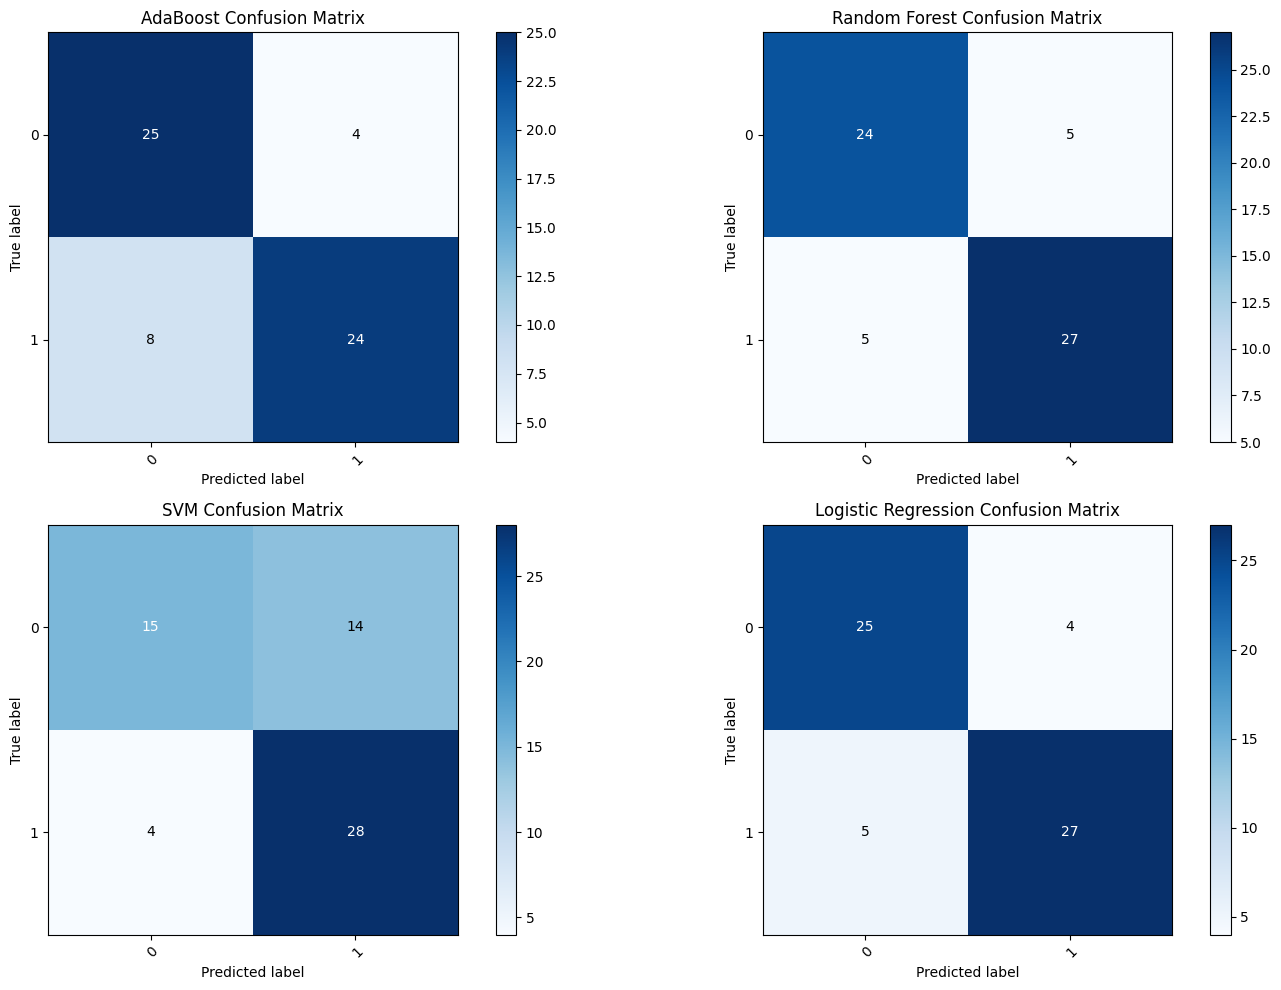

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Sample confusion matrices
confusion_matrix_adaboost = np.array([[25, 4], [8, 24]])
confusion_matrix_svm = np.array([[15, 14], [4, 28]])
confusion_matrix_logistic_regression = np.array([[25, 4], [5, 27]])
confusion_matrix_random_forest = np.array([[24, 5], [5, 27]])

def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

# Plotting 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_confusion_matrix(axs[0, 0], confusion_matrix_adaboost, classes=['0', '1'], title='AdaBoost Confusion Matrix')
plot_confusion_matrix(axs[0, 1], confusion_matrix_random_forest, classes=['0', '1'], title='Random Forest Confusion Matrix')
plot_confusion_matrix(axs[1, 0], confusion_matrix_svm, classes=['0', '1'], title='SVM Confusion Matrix')
plot_confusion_matrix(axs[1, 1], confusion_matrix_logistic_regression, classes=['0', '1'], title='Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()


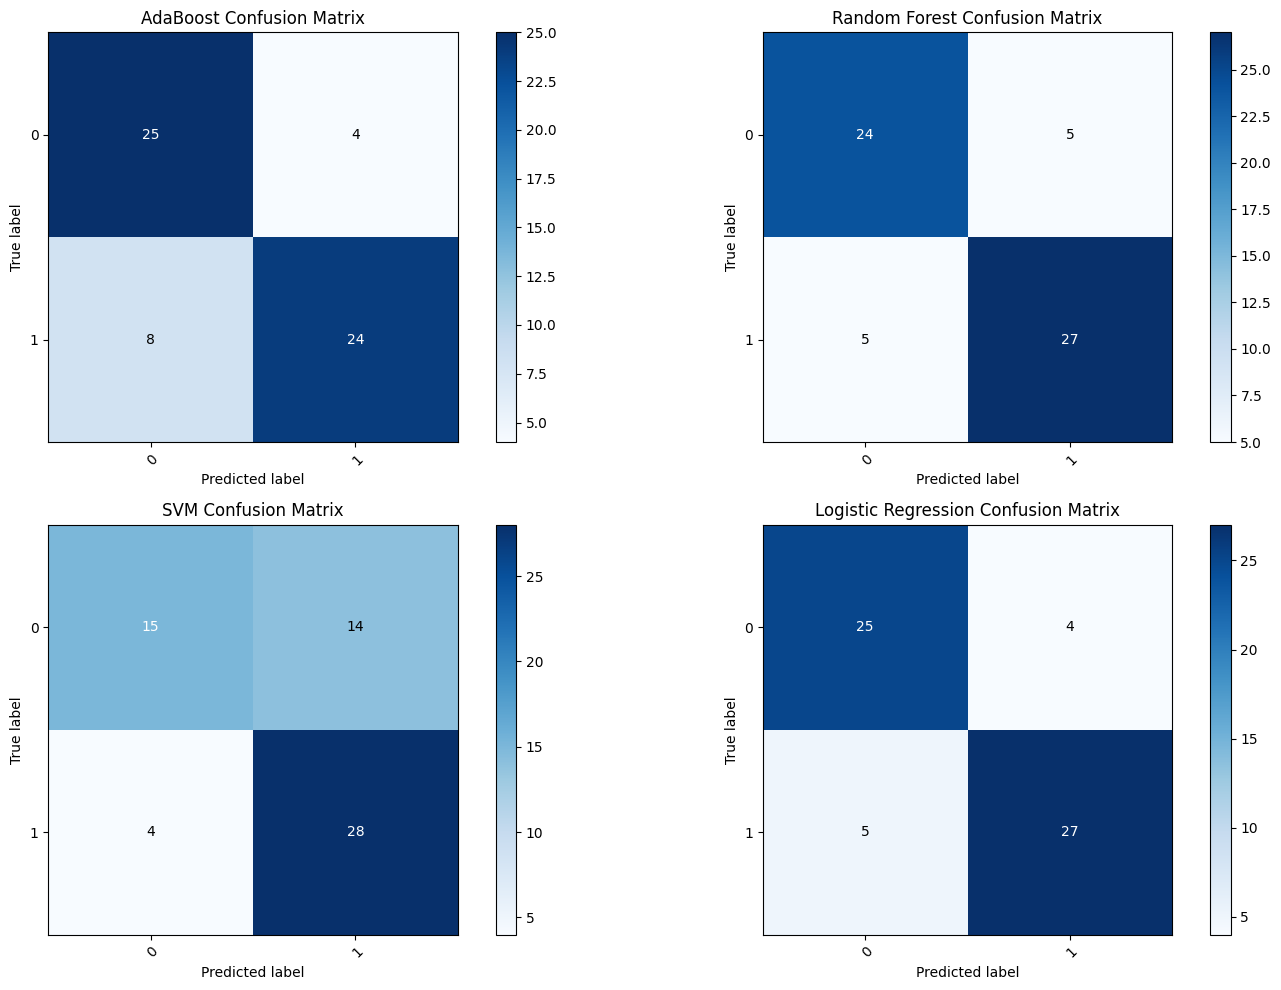

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Sample confusion matrices
confusion_matrix_adaboost = np.array([[25, 4], [8, 24]])
confusion_matrix_random_forest = np.array([[24, 5], [5, 27]])
confusion_matrix_svm = np.array([[15, 14], [4, 28]])
confusion_matrix_logistic_regression = np.array([[25, 4], [5, 27]])

def plot_confusion_matrix(ax, cm, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

# Plotting 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_confusion_matrix(axs[0, 0], confusion_matrix_adaboost, classes=['0', '1'], title='AdaBoost Confusion Matrix')
plot_confusion_matrix(axs[0, 1], confusion_matrix_random_forest, classes=['0', '1'], title='Random Forest Confusion Matrix')
plot_confusion_matrix(axs[1, 0], confusion_matrix_svm, classes=['0', '1'], title='SVM Confusion Matrix')
plot_confusion_matrix(axs[1, 1], confusion_matrix_logistic_regression, classes=['0', '1'], title='Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()
